# Plant Seedlings Classification
Determine the species of a seedling from an image


# Objective: 
Can you differentiate a weed from a crop seedling? Given an image differentiate between different plant types. Tthis dataset gives you an opportunity to experiment with different image recognition techniques, as well to provide a place to cross-pollenate ideas.

# Context:
The ability to do so effectively can mean better crop yields and better stewardship of the environment. The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of approximately 960 unique plants belonging to 12 species at several growth stages.

# Data Description: 
You are provided with a training set and a test set of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the competition is to create a classifier capable of determining a plant's species from a photo. 
The list of species is as follows:
 Black-grass 
 Charlock 
 Cleavers 
 Common Chickweed 
 Common wheat 
 Fat Hen 
 Loose Silky-bent 
 Maize 
 Scentless Mayweed 
 Shepherds Purse 
 Small-flowered Cranesbill 
 Sugar beet 
Know more at : https://www.kaggle.com/c/plant-seedlings-classification/data

#  Environment Setup and Loading Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

Using TensorFlow backend.


#  Data Preparation 
1. Loading Data 
2. Cleaning Data 
3. Data Representation & Feature Engineering (If Any) 
4. Creating Train and Validation Set

In [50]:
# Loading train data
project_path = "C:\\Users\\Aadee\\Desktop\\PythonCoding\\CNN\\plant-seedlings-classification"
train_path = "C:\\Users\\Aadee\\Desktop\\PythonCoding\\CNN\\plant-seedlings-classification\\train"
test_path = "C:\\Users\\Aadee\\Desktop\\PythonCoding\\CNN\\plant-seedlings-classification\\test"
os.chdir(train_path)    # Changing to train folder
os.listdir()

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [51]:
pwd


'C:\\Users\\Aadee\\Desktop\\PythonCoding\\CNN\\plant-seedlings-classification\\train'

In [52]:
x_train = []    # Initializing empty arrays to hold X & Y train images.
y_train = []

for i in os.listdir():
    #print(i)
    if (os.path.isdir(i)):
            for j in os.listdir(i):
                #print(j)
                try:
                    dummy = cv2.imread(project_path+'/train/' + i + "/" + j)
                    dummy = cv2.resize(dummy,(128,128))
                    x_train.append(dummy)
                    y_train.append(i)
                except Exception as e:
                    print(e)


In [53]:
x_train[0].shape

(128, 128, 3)

'Black-grass'

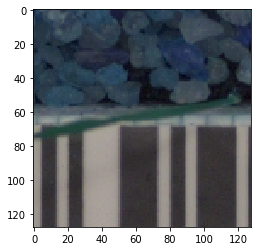

In [54]:
#Check the images & Label
plt.imshow(x_train[0].squeeze()) 
y_train[0]

In [55]:
# Load test images 
x_test=[]
os.chdir(test_path)    # Changing to test folder
for i in os.listdir():
    dummy = cv2.imread(i)
    dummy = cv2.resize(dummy,(128,128))
    x_test.append(dummy)

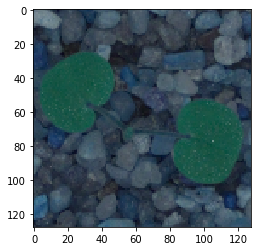

In [56]:
plt.imshow(x_test[0].squeeze()) # Check test images

In [57]:
# One Hot encoding of labels
dum = pd.get_dummies(y_train)   
y_train = dum
print(y_train.shape)
print(y_train)


(4750, 12)
      Black-grass  Charlock  Cleavers  Common Chickweed  Common wheat  \
0               1         0         0                 0             0   
1               1         0         0                 0             0   
2               1         0         0                 0             0   
3               1         0         0                 0             0   
4               1         0         0                 0             0   
5               1         0         0                 0             0   
6               1         0         0                 0             0   
7               1         0         0                 0             0   
8               1         0         0                 0             0   
9               1         0         0                 0             0   
10              1         0         0                 0             0   
11              1         0         0                 0             0   
12              1         0         0   

In [58]:
#COnverting both train & test data to np arrays for easy processing
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train.shape

(4750, 12)

In [59]:
# Splitting train data as traini & validation data
x_traini,x_val,y_traini,y_val = train_test_split(x_train,y_train,test_size = 0.25,random_state=123,stratify = y_train)
print("Training samples & Shape",x_traini.shape)
print("Validation Samples & Shape",x_val.shape)
print("Training labels & Shape",y_traini.shape)
print("Validation labels & Shape",y_val.shape)

Training samples & Shape (3562, 128, 128, 3)
Validation Samples & Shape (1188, 128, 128, 3)
Training labels & Shape (3562, 12)
Validation labels & Shape (1188, 12)


In [60]:
# Normalisation of input data
x_traini = x_traini/255
x_val = x_val/255

In [61]:
# Reshaping input data so that it is good to be passed onto as an input to the model built in next steps
x_traini = x_traini.reshape(x_traini.shape[0],128,128,3)
x_val = x_val.reshape(x_val.shape[0],128,128,3)

# Model Creation
o Write & Configure Model  o Compile Model  o Build Model & Checking Summary

In [27]:
# First model with multiple convolution layers followed by Dense layers
model = Sequential()

model.add(BatchNormalization())

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(128,128,3), name='conv_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5,name='drop_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu',name='conv_3'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_2'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5,name='drop_2'))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5,name='drop_3'))

#Add Fully Connected Layer with 12 units and activation function as 'softmax'
model.add(Dense(12, activation='softmax',name='dense_2'))

In [28]:
#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [30]:
#Training on the dataset & validation
model.fit(x_traini, y_traini,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(x_val, y_val))

Train on 3562 samples, validate on 1188 samples
Epoch 1/20
3562/3562 [==============================] - 397s 111ms/step - loss: 1.4588 - accuracy: 0.4801 - val_loss: 2.1698 - val_accuracy: 0.2113
Epoch 2/20
3562/3562 [==============================] - 358s 101ms/step - loss: 1.3683 - accuracy: 0.5154 - val_loss: 2.0308 - val_accuracy: 0.3013
Epoch 3/20
3562/3562 [==============================] - 602s 169ms/step - loss: 1.3269 - accuracy: 0.5239 - val_loss: 1.8478 - val_accuracy: 0.3855
Epoch 4/20
3562/3562 [==============================] - 231s 65ms/step - loss: 1.2601 - accuracy: 0.5458 - val_loss: 1.8621 - val_accuracy: 0.3729
Epoch 5/20
3562/3562 [==============================] - 230s 65ms/step - loss: 1.1922 - accuracy: 0.5811 - val_loss: 1.4107 - val_accuracy: 0.5909
Epoch 6/20
3562/3562 [==============================] - 255s 72ms/step - loss: 1.1540 - accuracy: 0.5859 - val_loss: 1.3818 - val_accuracy: 0.5581
Epoch 7/20
3562/3562 [==============================] - 317s 89ms/s

In [72]:
# second model with more batch normaization layers in between

model1 = Sequential()

model1.add(BatchNormalization())

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model1.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(128,128,3), name='conv_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model1.add(Conv2D(64, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model1.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Apply Dropout with 0.25 probability 
model1.add(Dropout(0.25,name='drop_1'))

model1.add(BatchNormalization())

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model1.add(Conv2D(64, (3, 3), activation='relu',name='conv_3'))

#Add a MaxPooling Layer of size 2X2 
model1.add(MaxPooling2D(pool_size=(2, 2),name='max_2'))

#Apply Dropout with 0.5 probability 
model1.add(Dropout(0.5,name='drop_2'))

model1.add(BatchNormalization())

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model1.add(Conv2D(64, (3, 3), activation='relu',name='conv_4'))

#Add a MaxPooling Layer of size 2X2 
model1.add(MaxPooling2D(pool_size=(2, 2),name='max_3'))

#Apply Dropout with 0.75 probability 
model1.add(Dropout(0.75,name='drop_3'))
#Flatten the layer
model1.add(Flatten())


#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model1.add(Dense(128, activation='relu',name='dense_1'))

#Apply Dropout with 0.5 probability 
model1.add(Dropout(0.5,name='drop_4'))

#Add Fully Connected Layer with 12 units and activation function as 'softmax'
model1.add(Dense(12, activation='softmax',name='dense_2'))

In [73]:
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model1.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [87]:
#Training on the dataset & validate 
model1.fit(x_traini, y_traini,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(x_val, y_val))

Train on 3562 samples, validate on 1188 samples
Epoch 1/5
3562/3562 [==============================] - 566s 159ms/step - loss: 2.4379 - accuracy: 0.1376 - val_loss: 2.4362 - val_accuracy: 0.1380
Epoch 2/5
3562/3562 [==============================] - 564s 158ms/step - loss: 2.4352 - accuracy: 0.1376 - val_loss: 2.4338 - val_accuracy: 0.1380
Epoch 3/5
3562/3562 [==============================] - 500s 140ms/step - loss: 2.4330 - accuracy: 0.1376 - val_loss: 2.4316 - val_accuracy: 0.1380
Epoch 4/5
3562/3562 [==============================] - 545s 153ms/step - loss: 2.4309 - accuracy: 0.1376 - val_loss: 2.4298 - val_accuracy: 0.1380
Epoch 5/5
3562/3562 [==============================] - 495s 139ms/step - loss: 2.4291 - accuracy: 0.1376 - val_loss: 2.4280 - val_accuracy: 0.1380


In [82]:
# Reversing the one hot encoding for labels
s2 = pd.Series(dum.columns[np.where(dum!=0)[1]])
s2[3]

'Black-grass'

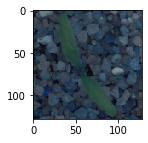

Model 1 prediction : 4
Model 2 prediction : 6


In [84]:
# Result visualization for multiple samples using both models
plt.figure(figsize=(2,2))
plt.imshow(x_val[3].squeeze())
plt.show()
print("Model 1 prediction :",np.argmax(model.predict(x_val[3].reshape(1,128,128,3))))
print("Model 2 prediction :",np.argmax(model1.predict(x_val[3].reshape(1,128,128,3))))

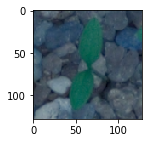

Model 1 prediction : 3 - Common Chickweed
Model 2 prediction : 6 - Common Chickweed


In [86]:
plt.figure(figsize=(2,2))
plt.imshow(x_val[999].squeeze())
plt.show()
print("Model 1 prediction :",np.argmax(model.predict(x_val[999].reshape(1,128,128,3))),"-",s2[999])
print("Model 2 prediction :",np.argmax(model1.predict(x_val[999].reshape(1,128,128,3))),"-",s2[999])

# Observations & Learning :
1. Initially this model had only 2 Convolution layers, which resulted in overfitting. Didnt generalise well even after few / more epochs.
2. Adding third Convolution layer helped in constant increase in both training & validation accuracy.Didnt see overfittiing.But,could reach only 75% on validation data set.This indicates that adding few more layers of Convolution layers has a potential achieve a better accuracy on test data set. Stopped at this point due to the time taken for computation. 
3. Adding batch normalization layers in between the Convolution layers. But this didnt help much with generalisation as we can see in the result.Tried this as an experiment.This model gets stuck in its local minima & Doesnt come out.